# Monte-Carlo Simulations of the 2-D Ising Model

In [1]:
%matplotlib inline
import pylab
import numpy as np
import matplotlib.pyplot as plt
from Ising import IsingSimulator

from joblib import Parallel, delayed
import multiprocessing

# make plot have white axes, and display larger (mods for ein)
plt.rcParams['figure.figsize'] = (10.0, 7.0)

plt.style.use('dark_background')

ImportError: No module named 'Ising'

## Generate sample data

- MEHTA claims phase transition at J/(kb T) = 0.4352 -> T = 2.29779
- MEHTA generates samples at J/(kb T) = 0.408 -> T = 2.45098

In [5]:
# job for parallelization
def isingRun(epochs):
    ising = IsingSimulator(40, 2.45098)
    ising.simulate(epochs)
    lat = np.array(ising.getLattice())
    return lat

numEpochs, numSamples, numCores = 20000, 20, multiprocessing.cpu_count()

lattices = Parallel(n_jobs=numCores, backend="multiprocessing")\
    (map(delayed(isingRun), [numEpochs] * numSamples))

# convert list into ndarray and put (-1,1) -> (0,1)
lattices = (np.array(lattices)+1)/2

4


array([[ 0.,  0.,  0., ...,  1.,  1.,  0.],
       [ 0.,  0.,  0., ...,  1.,  1.,  0.],
       [ 0.,  0.,  0., ...,  1.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  1.,  0.,  0.],
       [ 0.,  0.,  1., ...,  1.,  1.,  0.],
       [ 0.,  0.,  0., ...,  0.,  1.,  0.]])

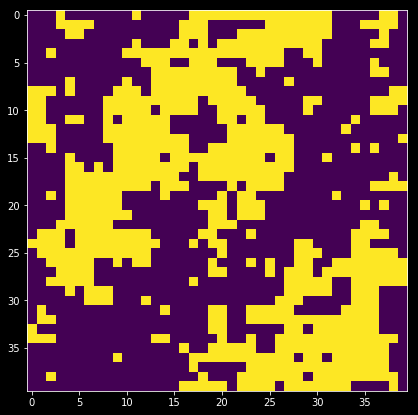

In [3]:
lattices[0].shape
print(numCores)
plt.imshow(lattices[0])
lattices[0]

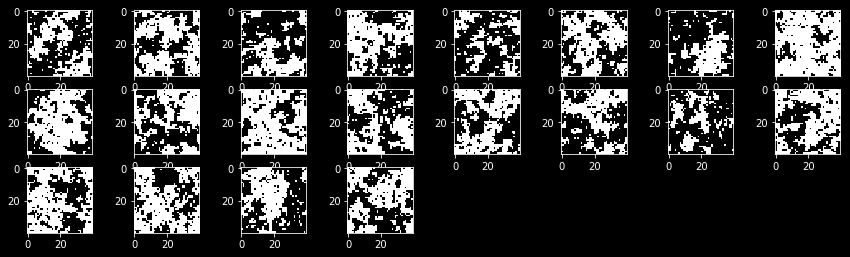

In [4]:
# at 10000 (40x40)
plt.rcParams['figure.figsize'] = (15.0, 20.0)
for i in range(lattices.shape[0]):
    plt.subplot(14, 8, i+1)
    plt.imshow(lattices[i].reshape(40, 40), cmap='gray')    

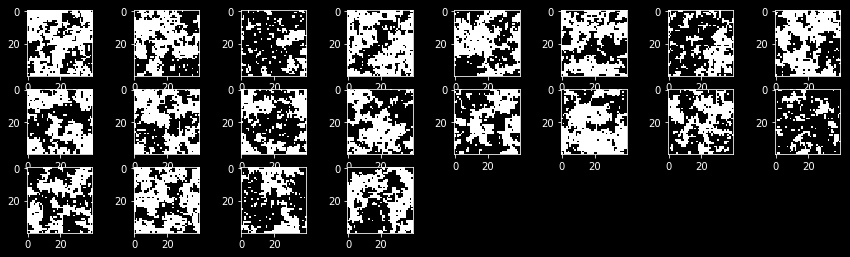

In [6]:
# at 20000 (40x40)
plt.rcParams['figure.figsize'] = (15.0, 20.0)
for i in range(lattices.shape[0]):
    plt.subplot(14, 8, i+1)
    plt.imshow(lattices[i].reshape(40, 40), cmap='gray')    

In [7]:
np.savez_compressed("data/outputTest1", lattices)

shape = (20, 40, 40)


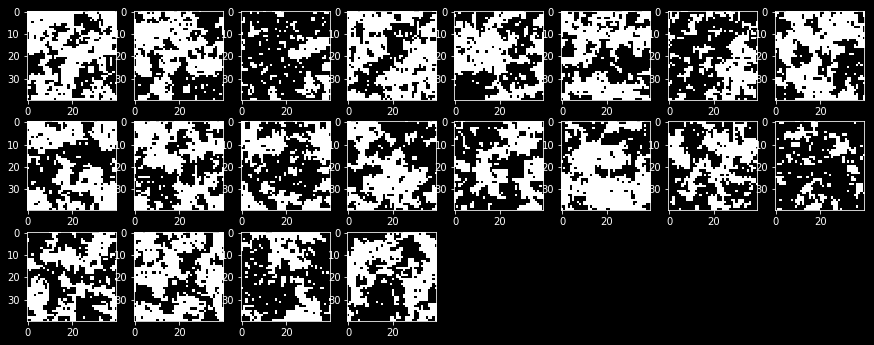

In [9]:
latticesLoaded = np.load("../codeIsing/data/outputTest1.npz")['arr_0']
print("shape = " + str(latticesLoaded.shape))

for i in range(20):
    plt.subplot(10, 8, i+1)
    plt.imshow(latticesLoaded[i].reshape(40, 40), cmap='gray')    